 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

This is yearly, I should be doing monthly

In [523]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

In [553]:
squamish1 = pd.read_csv('Theodosia_Scotty_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
squamish2 = pd.read_csv('Theodosia_Bypass_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
squamish3 = pd.read_csv('Theodosia_Diversion_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
watershed = 'Toba'

In [559]:
for squamish in [squamish1, squamish2, squamish3]:
    length = squamish.year.shape[0]
    dates = []
    for i in range(length):
        dates.append(datetime.datetime(squamish.year[i], squamish.month[i], squamish.day[i]))
    squamish['dates'] = dates
squamish1 = squamish1.set_index('dates')
squamish2 = squamish2.set_index('dates')
squamish3 = squamish3.set_index('dates')
squamish = squamish1 + squamish3 - squamish2

In [644]:
squamish = pd.read_csv('Salmon_Sayward_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
watershed = 'EVI_N'

In [645]:
length = squamish.year.shape[0]
dates = []
for i in range(length):
    dates.append(datetime.datetime(squamish.year[i], squamish.month[i], squamish.day[i]))
squamish['dates'] = dates
squamish = squamish.set_index('dates')
squamish[:5]

,year,month,day,flow
dates,,,,
1956-08-01,1956,8,1,16.1
1956-08-02,1956,8,2,15.5
1956-08-03,1956,8,3,15.5
1956-08-04,1956,8,4,15.0
1956-08-05,1956,8,5,14.7


/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


(0, 1000)

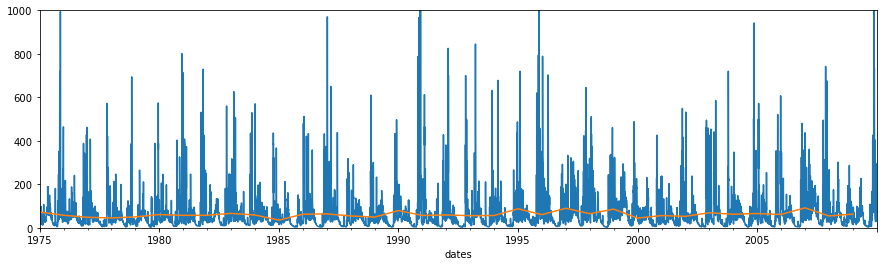

In [646]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
dateyears = []
squamish[squamish.year < 2010][squamish.year > 1974]['flow'].plot(ax=ax)
squamish[squamish.year < 2010][squamish.year > 1974]['flow'].resample(
    'A').mean().plot(ax=ax)
for j, year in enumerate(goodyears):
    dateyears.append(datetime.datetime(year, 12, 31))
ax.plot(dateyears, squamish_flux, 'r*-')
ax.set_ylim(0, 1000)

In [647]:
diffy = squamish.index[1:] - squamish.index[:-1]
diffy_data = pd.DataFrame({'date': squamish.index[1:], 
                           'year' : squamish.year[1:],
                        'gap' : diffy[:]})
diffy_data = diffy_data.set_index('date')

(720624.0, 720988.0)

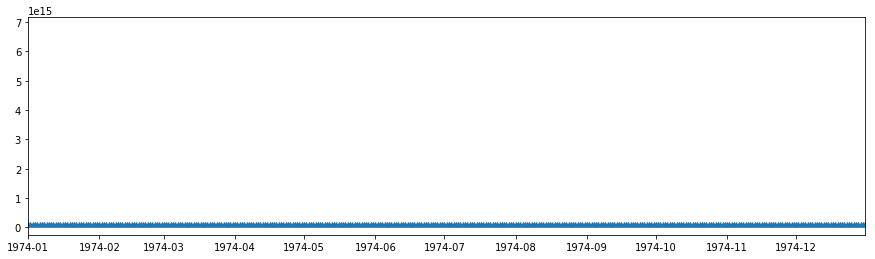

In [648]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
plt.plot(squamish.index[1:], diffy, '*-')
year = 1974
plt.xlim(datetime.datetime(year, 1, 1), datetime.datetime(year, 12, 31))
#plt.ylim(0, 1e15)

In [649]:
goodyears = []
for year in range(1970, 2010):
    maxgap = diffy_data.gap[diffy_data.year == year].max()
    if maxgap == datetime.datetime(1980, 1, 2) - datetime.datetime(1980, 1, 1):
        if not np.isnan(squamish.flow[squamish.year == year].mean()):
            goodyears.append(year)

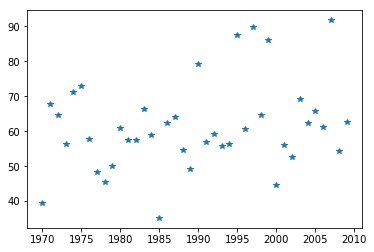

In [650]:
squamish_flux = np.zeros(len(goodyears))
for i, year in enumerate(goodyears):
    squamish_flux[i] = squamish.flow[squamish.year == year].mean()
plt.plot(goodyears, squamish_flux, '*');

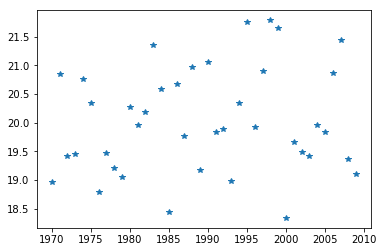

In [651]:
howe_flux = np.zeros(len(goodyears))
for i, year in enumerate(goodyears):
    morrison = pd.read_excel('Copy of Flow_Mon_X_Year.xlsx', sheetname=str(year))
    howe_flux[i] = morrison['Km^3'][morrison['Water Year'] == watershed]
plt.plot(goodyears, howe_flux, '*');

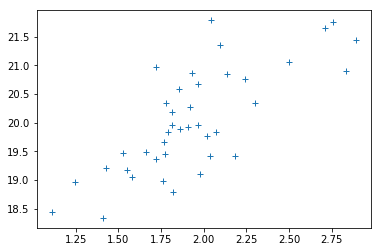

In [654]:
plt.plot(squamish_flux*365*86400/1e9, howe_flux, '+');

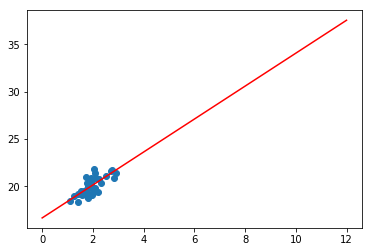

In [655]:
model = LinearRegression(fit_intercept=True)

model.fit(squamish_flux[:, np.newaxis]*365.25*86400/1e9, howe_flux)

xfit = np.linspace(0, 12, 10)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(squamish_flux*365.25*86400/1e9, howe_flux)
plt.plot(xfit, yfit, 'r');

0.533256038146


array([ 9.99244865])

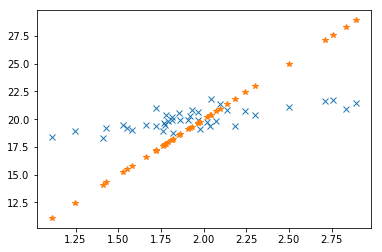

In [656]:
X = squamish_flux*365.25*86400/1e9
y = howe_flux

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.plot(X, y, 'x')
plt.plot(X, predictions,'*')
# Print out the statistics
print ((np.sqrt(((predictions-y)**2).sum()))/len(goodyears))
model.params

0.0943440637187
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     50.10
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           1.93e-08
Time:                        11:43:25   Log-Likelihood:                -36.103
No. Observations:                  40   AIC:                             76.21
Df Residuals:                      38   BIC:                             79.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6617      0.486    

array([ 16.66169125,   1.73854694])

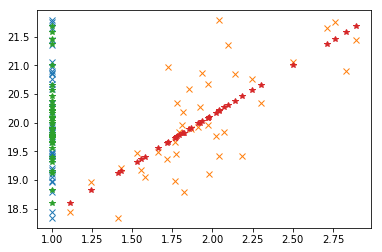

In [657]:
X = squamish_flux*365.25*86400/1e9
X = sm.add_constant(X)
y = howe_flux

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions2 = model.predict(X)
plt.plot(X, y, 'x')
plt.plot(X, predictions2,'*')
# Print out the statistics
print ((np.sqrt(((predictions2-y)**2).sum()))/len(goodyears))
print(model.summary())
model.params

0.104970099946
18.0933822466 1


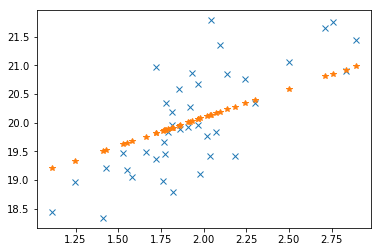

In [658]:
X = squamish_flux*365.25*86400/1e9
b = howe_flux.mean() - X.mean()
predictions3 = b + X

# Fit and make the predictions by the model
plt.plot(X, y, 'x')
plt.plot(X, predictions3,'*')
# Print out the statistics
print ((np.sqrt(((predictions3-y)**2).sum()))/len(goodyears))
print (b, '1')

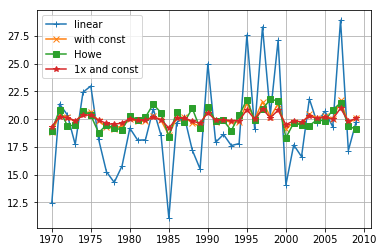

In [659]:
plt.plot(goodyears, predictions,'+-', label='linear')
plt.plot(goodyears, predictions2,'x-', label="with const")
plt.plot(goodyears, howe_flux, 's-', label='Howe')
plt.plot(goodyears, predictions3,'*-', label="1x and const")
plt.legend()
plt.grid()

In [628]:
# Homathko_Mouth for Bute.  Multiply by 1.99
# Clowhom_ClowhomLake for Jervis. 6.75 + 4.33 x   (6.75*1e9/365.25*86400)
# Squamish_Brackendale for Howe. Multiply by 2.27
# SanJuan_PortRenfrew for JdF. 3.72 + 6.00 x
# Salmon_Sayward for EVI_N, 16.67 + 1.74 x
# Englishman for EVI_S, 6.03 + 10.4 x
# Theodosia for Toba, 5.75 + 7.20 x
# Snohomish for Skagit, 17.57 + 1.36 x
# Nisqually for Puget, 10.75 +  4.33 x

In [ ]:
bute_flux = np.zeros((2010-1970+1, 12))
for i, year in enumerate(range(1970, 2010+1)):
    morrison = pd.read_excel('Copy of Flow_Mon_X_Year.xlsx', sheetname=str(year))
    bute_flux[i, :] = morrison[morrison['Water Year'] == watershed].iloc[:, 4:16]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
for i in range(12):
    ax.plot(np.arange(1970, 2010+1)+i/12.+1/12., bute_flux[:, i], '*');
monthly = squamish['flow'].resample('1M').mean()
ax.plot(monthly.index.year + (monthly.index.month)/12., monthly*30.5*86400/1e9*2, 'x-')
ax.set_xlim(2000, 2010)

    for j, month in enumerate(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']):